<a href="https://colab.research.google.com/github/dewirizki/UAS_DataMining/blob/main/UAS%20Data%20Mining%20Genap%202021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining dengan Tema Economic Growth (Pertumbuhan Ekonomi)



In [105]:
#Mengimport module yang akan digunakan
import warnings; warnings.simplefilter('ignore'); warnings.filterwarnings('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import linalg
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

## Data Pekerja berdasarkan Pekerjaan

### Exploratory Data Analysis Dataset Employment by Occupation

In [106]:
data_job = pd.read_csv('/content/Data/employment by occupation.csv')

In [107]:
data_job

,Countries,Year(s),"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others,Source
0,Brunei Darussalam,2014.0,33.2,7.6,11.4,19.5,1.4,13.0,13.9,ASEAN Secretariat
1,Cambodia,2014.0,3.7,0.8,3.9,15.3,58.1,17.3,0.9,ASEAN Secretariat
2,Indonesia,1999.0,3.9,0.3,4.9,23.6,43.0,24.0,0.3,ASEAN Secretariat
3,Lao's PDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASEAN Secretariat
4,Malaysia,2014.0,20.3,4.9,9.1,23.0,7.2,22.8,12.7,ASEAN Secretariat
5,Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASEAN Secretariat
6,Philippines,2014.0,7.5,15.8,6.2,19.3,13.6,37.1,0.5,ASEAN Secretariat
7,Singapore,2014.0,36.8,16.3,12.6,12.2,NaN,10.9,11.3,ASEAN Secretariat
8,Thailand,2014.0,10.3,3.7,3.9,18.9,31.7,21.2,10.2,ASEAN Secretariat
9,Viet Nam,2014.0,9.2,1.1,1.7,16.1,12.2,19.3,40.3,ASEAN Secretariat


In [108]:
data_job.columns

Index(['Countries', 'Year(s)', 'Professionals, technical and related workers',
       'Administrative, executive and managerial workers',
       'Clerical and related workers', 'Sales workers and services workers',
       'Agricultural, animal husbandry and forestry workers; fishermen and hunters ',
       'Production and related workers, transport equipment operators and labourers',
       'Others', 'Source'],
      dtype='object')

In [109]:
data_job.drop('Source', axis=1, inplace=True)
data_job.drop('Year(s)', axis=1, inplace=True)

In [110]:
data_job

,Countries,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
0,Brunei Darussalam,33.2,7.6,11.4,19.5,1.4,13.0,13.9
1,Cambodia,3.7,0.8,3.9,15.3,58.1,17.3,0.9
2,Indonesia,3.9,0.3,4.9,23.6,43.0,24.0,0.3
3,Lao's PDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Malaysia,20.3,4.9,9.1,23.0,7.2,22.8,12.7
5,Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Philippines,7.5,15.8,6.2,19.3,13.6,37.1,0.5
7,Singapore,36.8,16.3,12.6,12.2,NaN,10.9,11.3
8,Thailand,10.3,3.7,3.9,18.9,31.7,21.2,10.2
9,Viet Nam,9.2,1.1,1.7,16.1,12.2,19.3,40.3


In [111]:
#Melihat tipe data dari masing masing-masing variabel
data_job.dtypes

Countries                                                                       object
Professionals, technical and related workers                                   float64
Administrative, executive and managerial workers                               float64
Clerical and related workers                                                   float64
Sales workers and services workers                                             float64
Agricultural, animal husbandry and forestry workers; fishermen and hunters     float64
Production and related workers, transport equipment operators and labourers    float64
Others                                                                         float64
dtype: object

In [112]:
#Untuk mengetahui berapa banyak Missing Values di masing-masing variabel
print(data_job.isnull().sum())

Countries                                                                      0
Professionals, technical and related workers                                   2
Administrative, executive and managerial workers                               2
Clerical and related workers                                                   2
Sales workers and services workers                                             2
Agricultural, animal husbandry and forestry workers; fishermen and hunters     3
Production and related workers, transport equipment operators and labourers    2
Others                                                                         2
dtype: int64


### Mengimputasi missing value dengan median dan mean

In [113]:
data_job['Professionals, technical and related workers'].fillna(data_job['Professionals, technical and related workers'].mean(),inplace=True)
data_job['Administrative, executive and managerial workers'].fillna(data_job['Administrative, executive and managerial workers'].mean(),inplace=True)
data_job['Clerical and related workers'].fillna(data_job['Clerical and related workers'].mean(),inplace=True)
data_job['Sales workers and services workers'].fillna(data_job['Sales workers and services workers'].mean(),inplace=True)
data_job['Agricultural, animal husbandry and forestry workers; fishermen and hunters '].fillna(data_job['Agricultural, animal husbandry and forestry workers; fishermen and hunters '].mean(),inplace=True)
data_job['Production and related workers, transport equipment operators and labourers'].fillna(data_job['Production and related workers, transport equipment operators and labourers'].mean(),inplace=True)
data_job['Others'].fillna(data_job['Others'].median(),inplace=True)

Mengimputasi missing value dapat dilakukan dengan berbagai cara, salah satunya dengan ***univariate imputation*** dengan menggunakan median, mean maupun modus. Data missing value yang diimputasi dengan menggunakan median maupun meann dikarenakan data numerik. Data yang berdistribusi skewed ke kiri maupun kanan diimputasi dengan menggunakan median, sedangkan sisanya diimputasi menggunakan mean.

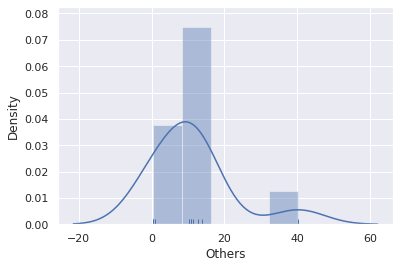

In [114]:
p = sns.distplot(data_job['Others'], kde=True, rug=True)

In [115]:
data_job

,Countries,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
0,Brunei Darussalam,33.2000,7.6000,11.4000,19.5000,1.400000,13.0,13.90
1,Cambodia,3.7000,0.8000,3.9000,15.3000,58.100000,17.3,0.90
2,Indonesia,3.9000,0.3000,4.9000,23.6000,43.000000,24.0,0.30
3,Lao's PDR,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
4,Malaysia,20.3000,4.9000,9.1000,23.0000,7.200000,22.8,12.70
5,Myanmar,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
6,Philippines,7.5000,15.8000,6.2000,19.3000,13.600000,37.1,0.50
7,Singapore,36.8000,16.3000,12.6000,12.2000,23.885714,10.9,11.30
8,Thailand,10.3000,3.7000,3.9000,18.9000,31.700000,21.2,10.20
9,Viet Nam,9.2000,1.1000,1.7000,16.1000,12.200000,19.3,40.30


In [116]:
#Menambahkan Variabel Tahun
data_job['Tahun']='2014','2014','1999','2014','2014','2014','2014','2014','2014','2014'

In [117]:
#Mengubah letak kolom 
cols = data_job.columns.tolist()

In [118]:
cols = cols[-1:] + cols[:-1]

In [119]:
cols

['Tahun',
 'Countries',
 'Professionals, technical and related workers',
 'Administrative, executive and managerial workers',
 'Clerical and related workers',
 'Sales workers and services workers',
 'Agricultural, animal husbandry and forestry workers; fishermen and hunters ',
 'Production and related workers, transport equipment operators and labourers',
 'Others']

In [120]:
#Dimasukan kedalam variabel data_job
data_job = data_job[cols]

In [121]:
data_job

,Tahun,Countries,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
0,2014,Brunei Darussalam,33.2000,7.6000,11.4000,19.5000,1.400000,13.0,13.90
1,2014,Cambodia,3.7000,0.8000,3.9000,15.3000,58.100000,17.3,0.90
2,1999,Indonesia,3.9000,0.3000,4.9000,23.6000,43.000000,24.0,0.30
3,2014,Lao's PDR,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
4,2014,Malaysia,20.3000,4.9000,9.1000,23.0000,7.200000,22.8,12.70
5,2014,Myanmar,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
6,2014,Philippines,7.5000,15.8000,6.2000,19.3000,13.600000,37.1,0.50
7,2014,Singapore,36.8000,16.3000,12.6000,12.2000,23.885714,10.9,11.30
8,2014,Thailand,10.3000,3.7000,3.9000,18.9000,31.700000,21.2,10.20
9,2014,Viet Nam,9.2000,1.1000,1.7000,16.1000,12.200000,19.3,40.30


In [122]:
#Mengubah tipe data variabel Tahun
data_job['Tahun']=data_job['Tahun'].astype('datetime64')

In [123]:
#Menjadikan variabel 'Tahun' menjadi index pada dataset ini
data_job= data_job.set_index(['Tahun'])

In [124]:
data_job=data_job.sort_values(by='Tahun')

In [125]:
data_job

,Countries,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
Tahun,,,,,,,,
1999-01-01,Indonesia,3.9000,0.3000,4.9000,23.6000,43.000000,24.0,0.30
2014-01-01,Brunei Darussalam,33.2000,7.6000,11.4000,19.5000,1.400000,13.0,13.90
2014-01-01,Cambodia,3.7000,0.8000,3.9000,15.3000,58.100000,17.3,0.90
2014-01-01,Lao's PDR,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
2014-01-01,Malaysia,20.3000,4.9000,9.1000,23.0000,7.200000,22.8,12.70
2014-01-01,Myanmar,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
2014-01-01,Philippines,7.5000,15.8000,6.2000,19.3000,13.600000,37.1,0.50
2014-01-01,Singapore,36.8000,16.3000,12.6000,12.2000,23.885714,10.9,11.30
2014-01-01,Thailand,10.3000,3.7000,3.9000,18.9000,31.700000,21.2,10.20


In [126]:
data_job.dtypes

Countries                                                                       object
Professionals, technical and related workers                                   float64
Administrative, executive and managerial workers                               float64
Clerical and related workers                                                   float64
Sales workers and services workers                                             float64
Agricultural, animal husbandry and forestry workers; fishermen and hunters     float64
Production and related workers, transport equipment operators and labourers    float64
Others                                                                         float64
dtype: object

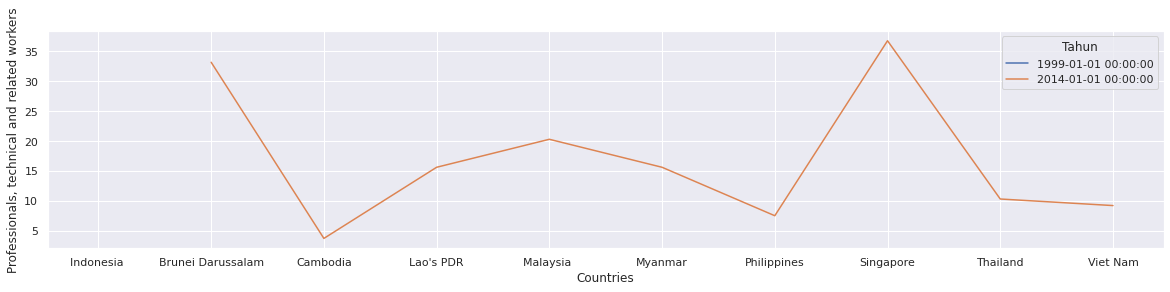

In [127]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Professionals, technical and related workers", data=data_job, hue='Tahun')

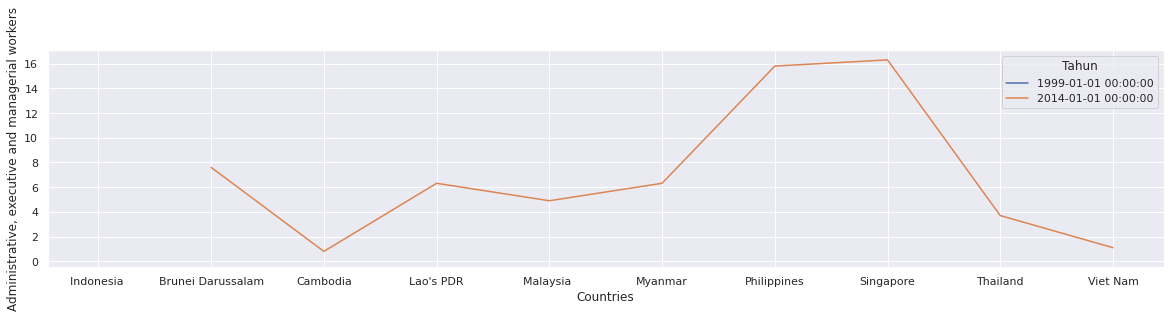

In [128]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Administrative, executive and managerial workers", data=data_job, hue='Tahun')

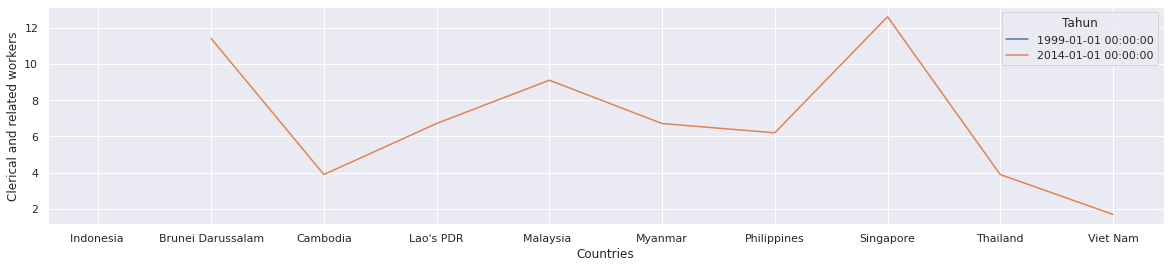

In [129]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Clerical and related workers", data=data_job, hue='Tahun')

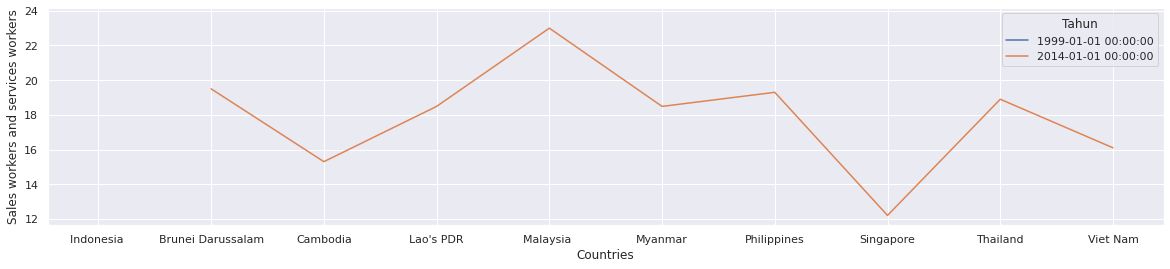

In [130]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Sales workers and services workers", data=data_job, hue='Tahun')

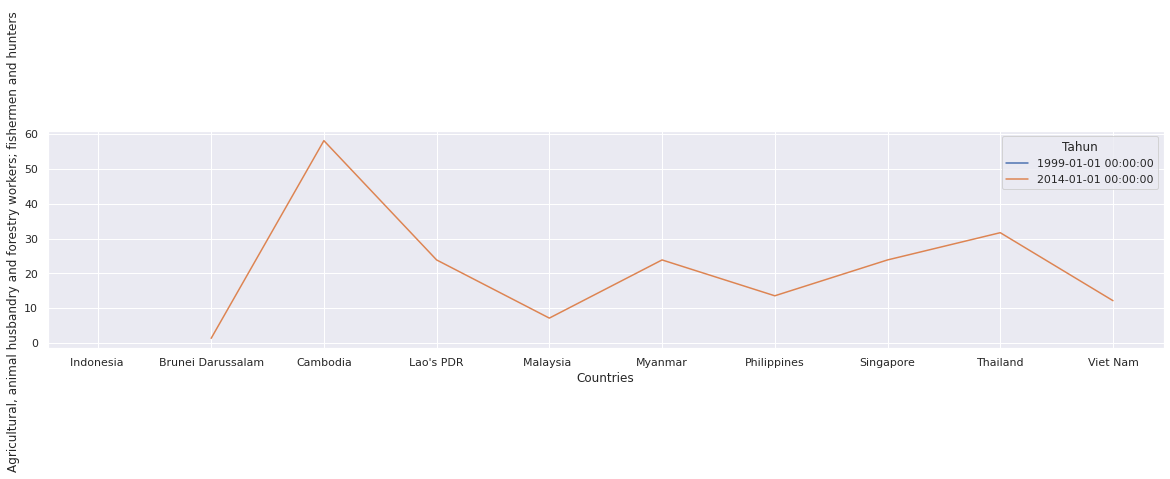

In [131]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Agricultural, animal husbandry and forestry workers; fishermen and hunters ", data=data_job, hue='Tahun')

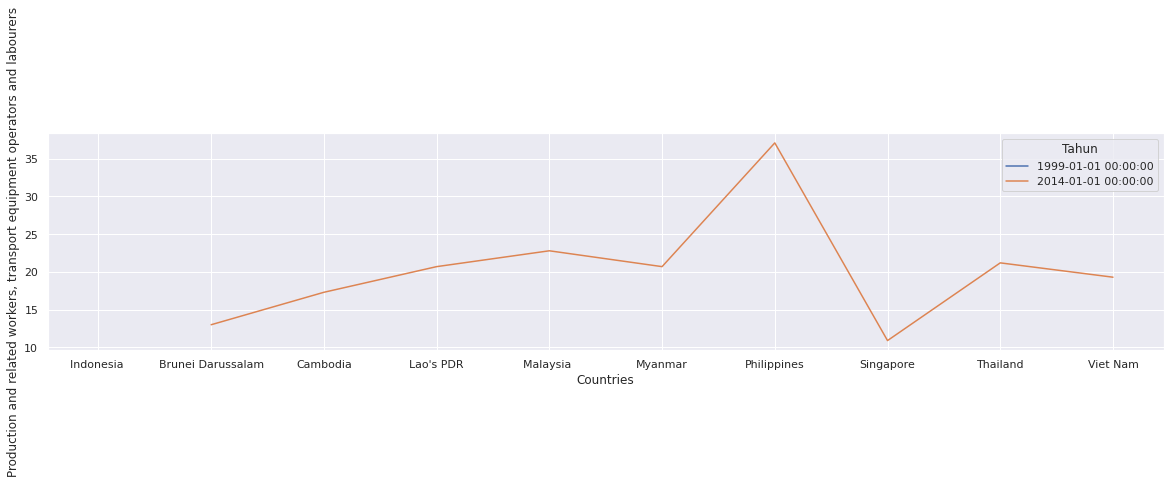

In [132]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Production and related workers, transport equipment operators and labourers", data=data_job, hue='Tahun')

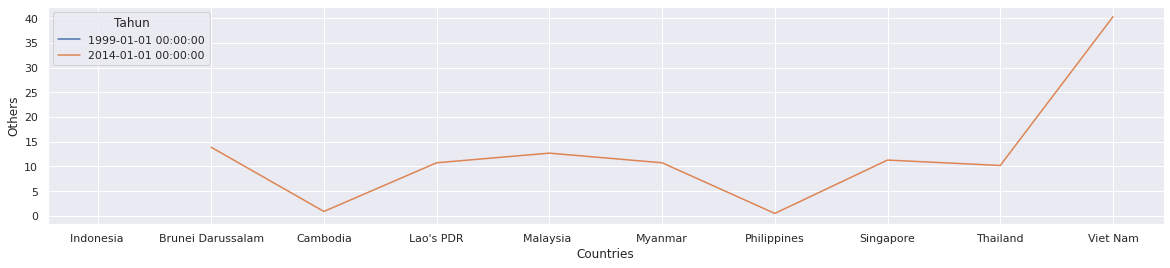

In [133]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Others", data=data_job, hue='Tahun')

# Data Penganggurang Orang Dewasa (Adult Unemployment)

In [134]:
#Mengimport data pengangguuran dewasa di ASEAN
data_adultune = pd.read_csv('/content/Data/adult unemployment.csv')

In [135]:
data_adultune.head()

,Countries,2004M,2004F,2005M,2005F,2006M,2006F,2007M,2007F,2008M,2008F,2009M,2009F,2010M,2010F,2011M,2011F,2012M,2012F,2013M,2013F,2014M,2014F,Source
0,Brunei Darussalam,4.2,5.6,NaN,NaN,7.4,9.2,7.4,9.6,7.5,10.1,7.5,10.7,7.6,11.3,7.5,11.7,7.6,12.4,NaN,NaN,6.2,7.8,ASEAN Secretariat
1,Cambodia,1.9,2.7,NaN,NaN,NaN,NaN,0.7,0.8,0.3,0.4,0.2,0.1,0.4,0.3,0.3,0.1,0.1,0.2,0.3,0.3,NaN,NaN,ASEAN Secretariat
2,Indonesia,10.5,16.8,9.3,14.7,8.5,13.4,8.1,10.8,7.6,9.7,7.5,8.5,6.2,8.7,5.9,7.6,5.8,6.8,6.1,6.5,5.8,6.3,ASEAN Secretariat
3,Lao's PDR,NaN,NaN,1.3,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASEAN Secretariat
4,Malaysia,3.4,3.8,3.4,3.7,3.3,3.4,3.1,3.4,3.2,3.7,3.6,3.8,3.2,3.4,2.9,3.3,2.9,3.2,2.9,3.4,NaN,NaN,ASEAN Secretariat


In [136]:
data_adultune.columns

Index(['Countries', '2004M', '2004F', '2005M', '2005F', '2006M', '2006F',
       '2007M', '2007F', '2008M', '2008F', '2009M', '2009F', '2010M', '2010F',
       '2011M', '2011F', '2012M', '2012F', '2013M', '2013F', '2014M', '2014F',
       'Source '],
      dtype='object')

In [137]:
data_adultune.drop('Source ', axis=1, inplace=True)

## Memisahkan antar data pengangguran laki-laki dan perempuan

### Data Pengangguran Laki-Laki

In [138]:
data_adultune_male=data_adultune[['Countries','2004M','2005M','2006M','2007M','2008M','2009M','2010M','2011M','2012M','2013M','2014M']]

In [139]:
data_adultune_male=data_adultune_male.rename(columns={'2004M':'2004','2005M':'2005','2006M':'2006','2007M':'2007','2008M':'2008','2009M':'2009',\
                                   '2010M':'2010','2011M':'2011','2012M':'2012','2013M':'2013','2014M':'2014'})

In [140]:
#Untuk mengetahu tipe data pada dataset data_adultune_male
data_adultune_male.dtypes

Countries     object
2004         float64
2005         float64
2006         float64
2007         float64
2008         float64
2009         float64
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
dtype: object

In [141]:
#Untuk mengetahui missing value
print(data_adultune_male.isnull().sum())

Countries    0
2004         1
2005         3
2006         3
2007         1
2008         1
2009         1
2010         0
2011         1
2012         1
2013         2
2014         5
dtype: int64


In [142]:
#Mengimputasi missing value dengan menggunakan mean atau median
data_adultune_male['2004'].fillna(data_adultune_male['2004'].median(),inplace=True)
data_adultune_male['2005'].fillna(data_adultune_male['2005'].mean(),inplace=True)
data_adultune_male['2006'].fillna(data_adultune_male['2006'].mean(),inplace=True)
data_adultune_male['2006'].fillna(data_adultune_male['2006'].mean(),inplace=True)
data_adultune_male['2007'].fillna(data_adultune_male['2007'].median(),inplace=True)
data_adultune_male['2008'].fillna(data_adultune_male['2008'].median(),inplace=True)
data_adultune_male['2009'].fillna(data_adultune_male['2009'].mean(),inplace=True)
data_adultune_male['2011'].fillna(data_adultune_male['2011'].median(),inplace=True)
data_adultune_male['2012'].fillna(data_adultune_male['2012'].mean(),inplace=True)
data_adultune_male['2013'].fillna(data_adultune_male['2013'].median(),inplace=True)
data_adultune_male['2014'].fillna(data_adultune_male['2014'].median(),inplace=True)

Mengimputasi missing value dapat dilakukan dengan berbagai cara, salah satunya dengan ***univariate imputation*** dengan menggunakan median, mean maupun modus. Data missing value yang diimputasi dengan menggunakan median maupun meann dikarenakan data numerik. Data yang berdistribusi skewed ke kiri maupun kanan diimputasi dengan menggunakan median, sedangkan sisanya diimputasi menggunakan mean.

In [143]:
print(data_adultune_male.isnull().sum())

Countries    0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
dtype: int64


In [144]:
data_adultune_male

,Countries,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Brunei Darussalam,4.2,4.414286,7.400000,7.4,7.5,7.500000,7.6,7.5,7.600000,2.8,6.2
1,Cambodia,1.9,4.414286,5.042857,0.7,0.3,0.200000,0.4,0.3,0.100000,0.3,3.8
2,Indonesia,10.5,9.300000,8.500000,8.1,7.6,7.500000,6.2,5.9,5.800000,6.1,5.8
3,Lao's PDR,3.6,1.300000,5.042857,3.1,3.2,4.188889,1.8,2.9,3.555556,2.8,3.8
4,Malaysia,3.4,3.400000,3.300000,3.1,3.2,3.600000,3.2,2.9,2.900000,2.9,3.8
5,Myanmar,3.6,3.700000,3.700000,3.7,3.7,3.700000,3.7,3.7,3.700000,3.7,3.8
6,Philippines,10.4,7.400000,7.700000,6.4,7.0,7.400000,7.4,6.7,7.000000,6.7,3.8
7,Singapore,5.6,3.900000,3.400000,2.8,3.0,4.100000,3.0,2.6,2.700000,2.7,2.7
8,Thailand,2.1,1.900000,1.300000,1.3,1.3,1.200000,0.9,0.6,0.600000,0.8,3.8
9,Viet Nam,1.9,4.414286,5.042857,2.3,2.5,2.500000,2.3,1.7,1.600000,2.0,2.1


In [145]:
data_adultune_male.rename(index=lambda x: data_adultune_male.at[x,'Countries'], inplace=True)
data_adultune_male= data_adultune_male.transpose()

In [146]:
data_adultune_male = data_adultune_male.drop(['Countries'])
df1 = data_adultune_male.loc[(data_adultune_male != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

In [147]:
df1

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam
2004-01-01,4.2,1.9,10.5,3.6,3.4,3.6,10.4,5.6,2.1,1.9
2005-01-01,4.41429,4.41429,9.3,1.3,3.4,3.7,7.4,3.9,1.9,4.41429
2006-01-01,7.4,5.04286,8.5,5.04286,3.3,3.7,7.7,3.4,1.3,5.04286
2007-01-01,7.4,0.7,8.1,3.1,3.1,3.7,6.4,2.8,1.3,2.3
2008-01-01,7.5,0.3,7.6,3.2,3.2,3.7,7,3,1.3,2.5
2009-01-01,7.5,0.2,7.5,4.18889,3.6,3.7,7.4,4.1,1.2,2.5
2010-01-01,7.6,0.4,6.2,1.8,3.2,3.7,7.4,3,0.9,2.3
2011-01-01,7.5,0.3,5.9,2.9,2.9,3.7,6.7,2.6,0.6,1.7
2012-01-01,7.6,0.1,5.8,3.55556,2.9,3.7,7,2.7,0.6,1.6
2013-01-01,2.8,0.3,6.1,2.8,2.9,3.7,6.7,2.7,0.8,2


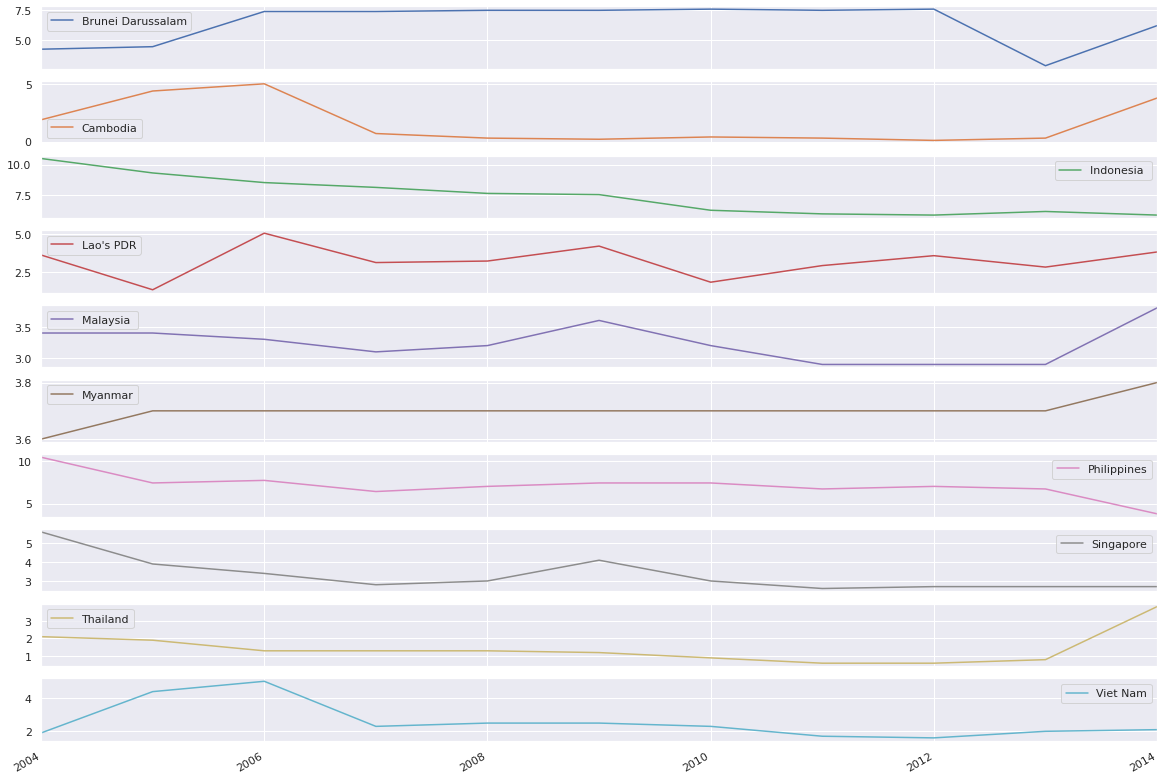

In [148]:
p = df1.plot(subplots=True, figsize=(20,15))

In [149]:
#Menambahkan Kolom jenis kelamin
df1['Jenis Kelamin']='Laki-laki'

In [150]:
df1.head()

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
2004-01-01,4.2,1.9,10.5,3.6,3.4,3.6,10.4,5.6,2.1,1.9,Laki-laki
2005-01-01,4.41429,4.41429,9.3,1.3,3.4,3.7,7.4,3.9,1.9,4.41429,Laki-laki
2006-01-01,7.4,5.04286,8.5,5.04286,3.3,3.7,7.7,3.4,1.3,5.04286,Laki-laki
2007-01-01,7.4,0.7,8.1,3.1,3.1,3.7,6.4,2.8,1.3,2.3,Laki-laki
2008-01-01,7.5,0.3,7.6,3.2,3.2,3.7,7,3,1.3,2.5,Laki-laki


In [151]:
data_male = df1

In [152]:
data_male['Tahun'] = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']

In [153]:
data_male['Brunei Darussalam']=data_male['Brunei Darussalam'].astype('float64')
data_male['Cambodia']=data_male['Cambodia'].astype('float64')
data_male['Indonesia ']=data_male['Indonesia '].astype('float64')
data_male["Lao's PDR"]=data_male["Lao's PDR"].astype('float64')
data_male["Malaysia "]=data_male["Malaysia "].astype('float64')
data_male["Myanmar"]=data_male["Myanmar"].astype('float64')
data_male["Philippines"]=data_male["Philippines"].astype('float64')
data_male["Singapore"]=data_male["Singapore"].astype('float64')
data_male["Thailand"]=data_male["Thailand"].astype('float64')
data_male["Viet Nam"]=data_male["Viet Nam"].astype('float64')
data_male["Jenis Kelamin"]=data_male["Jenis Kelamin"].astype('category')
data_male['Tahun']=data_male['Tahun'].astype('datetime64')

In [154]:
col1 = data_male.columns.tolist()

In [155]:
col1 = col1[-1:] + col1[:-1]

In [156]:
data_male=data_male[col1]

In [157]:
data_male= data_male.set_index(['Tahun'])

In [158]:
data_male.head()

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
Tahun,,,,,,,,,,,
2004-01-01,4.200000,1.900000,10.5,3.600000,3.4,3.6,10.4,5.6,2.1,1.900000,Laki-laki
2005-01-01,4.414286,4.414286,9.3,1.300000,3.4,3.7,7.4,3.9,1.9,4.414286,Laki-laki
2006-01-01,7.400000,5.042857,8.5,5.042857,3.3,3.7,7.7,3.4,1.3,5.042857,Laki-laki
2007-01-01,7.400000,0.700000,8.1,3.100000,3.1,3.7,6.4,2.8,1.3,2.300000,Laki-laki
2008-01-01,7.500000,0.300000,7.6,3.200000,3.2,3.7,7.0,3.0,1.3,2.500000,Laki-laki


### Data Female Adult Unemployment

In [159]:
data_adultune_female = data_adultune[['Countries','2004F','2005F','2006F','2007F','2008F','2009F','2010F','2011F','2012F','2013F','2014F']]

In [160]:
data_adultune_female = data_adultune_female.rename(columns={'2004F':'2004','2005F':'2005','2006F':'2006','2007F':'2007','2008F':'2008','2009F':'2009',\
                                   '2010F':'2010','2011F':'2011','2012F':'2012','2013F':'2013','2014F':'2014'}) 

In [161]:
data_adultune_female

,Countries,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Brunei Darussalam,5.6,NaN,9.2,9.6,10.1,10.7,11.3,11.7,12.4,NaN,7.8
1,Cambodia,2.7,NaN,NaN,0.8,0.4,0.1,0.3,0.1,0.2,0.3,NaN
2,Indonesia,16.8,14.7,13.4,10.8,9.7,8.5,8.7,7.6,6.8,6.5,6.3
3,Lao's PDR,NaN,1.2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,Malaysia,3.8,3.7,3.4,3.4,3.7,3.8,3.4,3.3,3.2,3.4,NaN
5,Myanmar,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.0
6,Philippines,11.7,7.3,6.9,6.0,6.6,6.7,6.7,6.1,6.7,5.9,NaN
7,Singapore,6.2,4.5,3.7,3.1,3.5,4.7,3.4,3.2,3.1,2.9,2.9
8,Thailand,2.1,1.7,1.1,1.1,1.0,1.1,0.8,0.7,0.5,0.8,NaN
9,Viet Nam,2.4,NaN,NaN,2.1,1.9,2.7,3.1,2.4,2.0,2.0,2.1


In [162]:
data_adultune_female.dtypes

Countries     object
2004         float64
2005         float64
2006         float64
2007         float64
2008         float64
2009         float64
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
dtype: object

In [163]:
#Untuk Mengetahui mising value
print(data_adultune_female.isnull().sum())

Countries    0
2004         1
2005         3
2006         3
2007         1
2008         1
2009         1
2010         0
2011         1
2012         1
2013         2
2014         5
dtype: int64


In [164]:
#Mengimputasi missing value dengan median atau mean
data_adultune_female['2004'].fillna(data_adultune_female['2004'].median(),inplace=True)
data_adultune_female['2005'].fillna(data_adultune_female['2005'].mean(),inplace=True)
data_adultune_female['2006'].fillna(data_adultune_female['2006'].mean(),inplace=True)
data_adultune_female['2007'].fillna(data_adultune_female['2007'].mean(),inplace=True)
data_adultune_female['2008'].fillna(data_adultune_female['2008'].mean(),inplace=True)
data_adultune_female['2009'].fillna(data_adultune_female['2009'].mean(),inplace=True)
data_adultune_female['2011'].fillna(data_adultune_female['2011'].mean(),inplace=True)
data_adultune_female['2012'].fillna(data_adultune_female['2012'].mean(),inplace=True)
data_adultune_female['2013'].fillna(data_adultune_female['2013'].mean(),inplace=True)
data_adultune_female['2014'].fillna(data_adultune_female['2014'].mean(),inplace=True)

Mengimputasi missing value dapat dilakukan dengan berbagai cara, salah satunya dengan ***univariate imputation*** dengan menggunakan median, mean maupun modus. Data missing value yang diimputasi dengan menggunakan median maupun meann dikarenakan data numerik. Data yang berdistribusi skewed ke kiri maupun kanan diimputasi dengan menggunakan median, sedangkan sisanya diimputasi menggunakan mean.

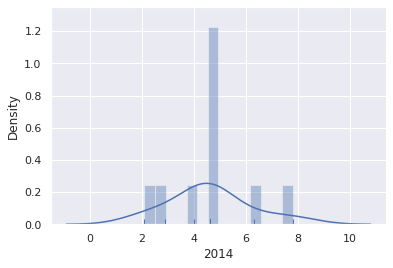

In [165]:
p = sns.distplot(data_adultune_female['2014'], kde=True, rug=True)

In [166]:
print(data_adultune_female.isnull().sum())

Countries    0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
dtype: int64


In [167]:
data_adultune_female.rename(index=lambda x: data_adultune_female.at[x,'Countries'], inplace=True)
data_adultune_female= data_adultune_female.transpose()

In [168]:
data_adultune_female = data_adultune_female.drop(['Countries'])
df2 = data_adultune_female.loc[(data_adultune_female != 0).any(1)]
df2.index = pd.to_datetime(df2.index)

In [169]:
df2

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam
2004-01-01,5.6,2.7,16.8,4.6,3.8,4.6,11.7,6.2,2.1,2.4
2005-01-01,5.38571,5.38571,14.7,1.2,3.7,4.6,7.3,4.5,1.7,5.38571
2006-01-01,9.2,6.04286,13.4,6.04286,3.4,4.6,6.9,3.7,1.1,6.04286
2007-01-01,9.6,0.8,10.8,4.61111,3.4,4.6,6,3.1,1.1,2.1
2008-01-01,10.1,0.4,9.7,4.61111,3.7,4.6,6.6,3.5,1,1.9
2009-01-01,10.7,0.1,8.5,4.76667,3.8,4.6,6.7,4.7,1.1,2.7
2010-01-01,11.3,0.3,8.7,2,3.4,4.6,6.7,3.4,0.8,3.1
2011-01-01,11.7,0.1,7.6,4.41111,3.3,4.6,6.1,3.2,0.7,2.4
2012-01-01,12.4,0.2,6.8,4.38889,3.2,4.6,6.7,3.1,0.5,2
2013-01-01,3.3,0.3,6.5,3.3,3.4,4.6,5.9,2.9,0.8,2


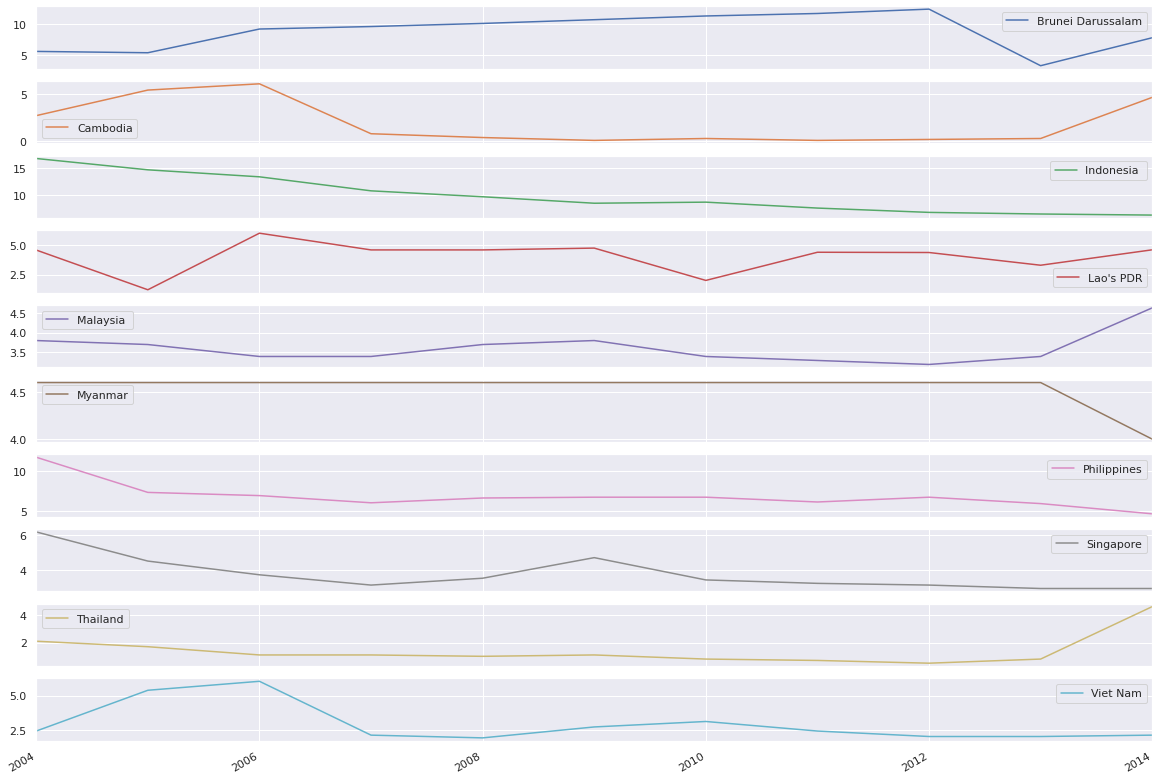

In [170]:
p = df2.plot(subplots=True, figsize=(20,15))

In [171]:
#Menambahkan kolom jenis kelamin
df2['Jenis Kelamin']='Perempuan'

In [172]:
df2.head()

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
2004-01-01,5.6,2.7,16.8,4.6,3.8,4.6,11.7,6.2,2.1,2.4,Perempuan
2005-01-01,5.38571,5.38571,14.7,1.2,3.7,4.6,7.3,4.5,1.7,5.38571,Perempuan
2006-01-01,9.2,6.04286,13.4,6.04286,3.4,4.6,6.9,3.7,1.1,6.04286,Perempuan
2007-01-01,9.6,0.8,10.8,4.61111,3.4,4.6,6,3.1,1.1,2.1,Perempuan
2008-01-01,10.1,0.4,9.7,4.61111,3.7,4.6,6.6,3.5,1,1.9,Perempuan


In [173]:
data_female = df2

In [174]:
data_female['Tahun'] = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']

In [175]:
data_female.dtypes

Brunei Darussalam    object
Cambodia             object
Indonesia            object
Lao's PDR            object
Malaysia             object
Myanmar              object
Philippines          object
Singapore            object
Thailand             object
Viet Nam             object
Jenis Kelamin        object
Tahun                object
dtype: object

In [176]:
data_female['Brunei Darussalam']=data_female['Brunei Darussalam'].astype('float64')
data_female['Cambodia']=data_female['Cambodia'].astype('float64')
data_female['Indonesia ']=data_female['Indonesia '].astype('float64')
data_female["Lao's PDR"]=data_female["Lao's PDR"].astype('float64')
data_female["Malaysia "]=data_female["Malaysia "].astype('float64')
data_female["Myanmar"]=data_female["Myanmar"].astype('float64')
data_female["Philippines"]=data_female["Philippines"].astype('float64')
data_female["Singapore"]=data_female["Singapore"].astype('float64')
data_female["Thailand"]=data_female["Thailand"].astype('float64')
data_female["Viet Nam"]=data_female["Viet Nam"].astype('float64')
data_female["Jenis Kelamin"]=data_female["Jenis Kelamin"].astype('category')
data_female['Tahun']=data_female['Tahun'].astype('datetime64')

In [177]:
col2 = data_female.columns.tolist()

In [178]:
col2 = col2[-1:] + col2[:-1]

In [179]:
col2

['Tahun',
 'Brunei Darussalam',
 'Cambodia',
 'Indonesia ',
 "Lao's PDR",
 'Malaysia ',
 'Myanmar',
 'Philippines',
 'Singapore',
 'Thailand',
 'Viet Nam',
 'Jenis Kelamin']

In [180]:
data_female = data_female[col2]

In [181]:
data_female= data_female.set_index(['Tahun'])

In [182]:
data_female.head()

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
Tahun,,,,,,,,,,,
2004-01-01,5.600000,2.700000,16.8,4.600000,3.8,4.6,11.7,6.2,2.1,2.400000,Perempuan
2005-01-01,5.385714,5.385714,14.7,1.200000,3.7,4.6,7.3,4.5,1.7,5.385714,Perempuan
2006-01-01,9.200000,6.042857,13.4,6.042857,3.4,4.6,6.9,3.7,1.1,6.042857,Perempuan
2007-01-01,9.600000,0.800000,10.8,4.611111,3.4,4.6,6.0,3.1,1.1,2.100000,Perempuan
2008-01-01,10.100000,0.400000,9.7,4.611111,3.7,4.6,6.6,3.5,1.0,1.900000,Perempuan


## Menggabungkan dataFrame data_male dan data_female

In [183]:
data = pd.concat([data_male,data_female])

In [184]:
data

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
Tahun,,,,,,,,,,,
2004-01-01,4.200000,1.900000,10.5,3.600000,3.40,3.6,10.40,5.6,2.10,1.900000,Laki-laki
2005-01-01,4.414286,4.414286,9.3,1.300000,3.40,3.7,7.40,3.9,1.90,4.414286,Laki-laki
2006-01-01,7.400000,5.042857,8.5,5.042857,3.30,3.7,7.70,3.4,1.30,5.042857,Laki-laki
2007-01-01,7.400000,0.700000,8.1,3.100000,3.10,3.7,6.40,2.8,1.30,2.300000,Laki-laki
2008-01-01,7.500000,0.300000,7.6,3.200000,3.20,3.7,7.00,3.0,1.30,2.500000,Laki-laki
2009-01-01,7.500000,0.200000,7.5,4.188889,3.60,3.7,7.40,4.1,1.20,2.500000,Laki-laki
2010-01-01,7.600000,0.400000,6.2,1.800000,3.20,3.7,7.40,3.0,0.90,2.300000,Laki-laki
2011-01-01,7.500000,0.300000,5.9,2.900000,2.90,3.7,6.70,2.6,0.60,1.700000,Laki-laki
2012-01-01,7.600000,0.100000,5.8,3.555556,2.90,3.7,7.00,2.7,0.60,1.600000,Laki-laki


In [185]:
data.sort_values(by='Tahun')

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
Tahun,,,,,,,,,,,
2004-01-01,4.200000,1.900000,10.5,3.600000,3.40,3.6,10.40,5.6,2.10,1.900000,Laki-laki
2004-01-01,5.600000,2.700000,16.8,4.600000,3.80,4.6,11.70,6.2,2.10,2.400000,Perempuan
2005-01-01,4.414286,4.414286,9.3,1.300000,3.40,3.7,7.40,3.9,1.90,4.414286,Laki-laki
2005-01-01,5.385714,5.385714,14.7,1.200000,3.70,4.6,7.30,4.5,1.70,5.385714,Perempuan
2006-01-01,7.400000,5.042857,8.5,5.042857,3.30,3.7,7.70,3.4,1.30,5.042857,Laki-laki
2006-01-01,9.200000,6.042857,13.4,6.042857,3.40,4.6,6.90,3.7,1.10,6.042857,Perempuan
2007-01-01,7.400000,0.700000,8.1,3.100000,3.10,3.7,6.40,2.8,1.30,2.300000,Laki-laki
2007-01-01,9.600000,0.800000,10.8,4.611111,3.40,4.6,6.00,3.1,1.10,2.100000,Perempuan
2008-01-01,7.500000,0.300000,7.6,3.200000,3.20,3.7,7.00,3.0,1.30,2.500000,Laki-laki


In [186]:
data.dtypes

Brunei Darussalam    float64
Cambodia             float64
Indonesia            float64
Lao's PDR            float64
Malaysia             float64
Myanmar              float64
Philippines          float64
Singapore            float64
Thailand             float64
Viet Nam             float64
Jenis Kelamin         object
dtype: object

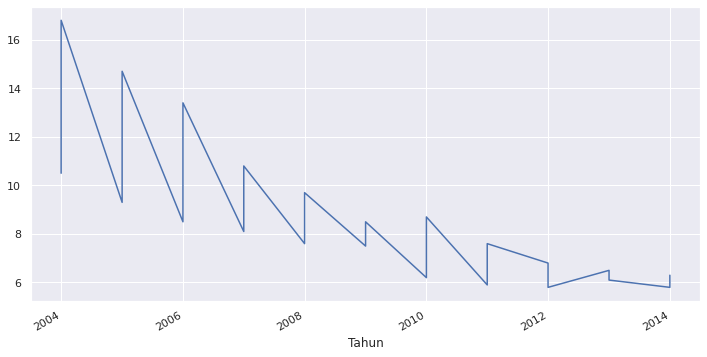

In [187]:
data['Indonesia '].plot(figsize=(12,6))

# Modelling Menggunakan ARIMA

## Memprediksi tingkat pengangguran di Negara Indoenesia berdasarkan Gender (Laki-Laki) dan Perempuan

### 1. DataFrame data_male

In [188]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest=adfuller(dataset, autolag = 'AIC')
  print('1. ADF : ',dftest[0])
  print('2. P-Value : ',dftest[1])
  print('3. Num of lag : ',dftest[2])
  print('4. Num of Observation Used for ADF Regression and Critical Values Calculation : ',dftest[3])
  print('5. Critical Values : ')
  for key, val in dftest[4].items():
    print("\t", key, ":", val)

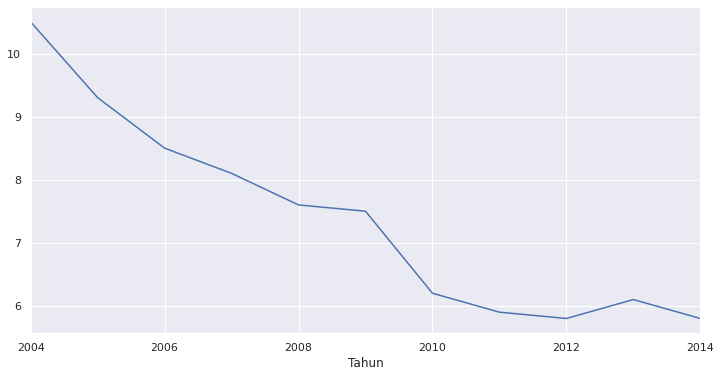

In [189]:
data_male['Indonesia '].plot(figsize=(12,6))

In [190]:
ad_test(data_male['Indonesia '])

1. ADF :  -2.8182582045655398
2. P-Value :  0.05571267222749922
3. Num of lag :  0
4. Num of Observation Used for ADF Regression and Critical Values Calculation :  10
5. Critical Values : 
	 1% : -4.331573
	 5% : -3.23295
	 10% : -2.7487


In [191]:
pip install pmdarima

In [192]:
from pmdarima import auto_arima

In [193]:
stepwise_fit = auto_arima(data_male['Indonesia '], trace = True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17.511, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19.381, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19.388, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22.327, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21.381, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.486 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  -6.755
Date:                Mon, 28 Jun 2021   AIC                             17.511
Time:                        09:35:03   BIC                             18.116
Sample:                             0   HQIC                            16.847
                                 - 11                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4700      0.161     -2.924      0.003      -0.785      -0.155
sigma2         0.2261      0.136      1.668      0.095      -0.040       0.492
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.70   Prob(JB):                         0.78
Heteroskedasticity (H):               1.17   Skew:                            -0.40
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [194]:
from statsmodels.tsa.arima_model import ARIMA 

In [195]:
print(data_male.shape)
train = data_male.iloc[:8]
test = data_male.iloc[8:]
print(train.shape, test.shape)

(11, 11)
(8, 11) (3, 11)


In [196]:
train

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
Tahun,,,,,,,,,,,
2004-01-01,4.200000,1.900000,10.5,3.600000,3.4,3.6,10.4,5.6,2.1,1.900000,Laki-laki
2005-01-01,4.414286,4.414286,9.3,1.300000,3.4,3.7,7.4,3.9,1.9,4.414286,Laki-laki
2006-01-01,7.400000,5.042857,8.5,5.042857,3.3,3.7,7.7,3.4,1.3,5.042857,Laki-laki
2007-01-01,7.400000,0.700000,8.1,3.100000,3.1,3.7,6.4,2.8,1.3,2.300000,Laki-laki
2008-01-01,7.500000,0.300000,7.6,3.200000,3.2,3.7,7.0,3.0,1.3,2.500000,Laki-laki
2009-01-01,7.500000,0.200000,7.5,4.188889,3.6,3.7,7.4,4.1,1.2,2.500000,Laki-laki
2010-01-01,7.600000,0.400000,6.2,1.800000,3.2,3.7,7.4,3.0,0.9,2.300000,Laki-laki
2011-01-01,7.500000,0.300000,5.9,2.900000,2.9,3.7,6.7,2.6,0.6,1.700000,Laki-laki


In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2004-01-01 to 2011-01-01
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brunei Darussalam  8 non-null      float64 
 1   Cambodia           8 non-null      float64 
 2   Indonesia          8 non-null      float64 
 3   Lao's PDR          8 non-null      float64 
 4   Malaysia           8 non-null      float64 
 5   Myanmar            8 non-null      float64 
 6   Philippines        8 non-null      float64 
 7   Singapore          8 non-null      float64 
 8   Thailand           8 non-null      float64 
 9   Viet Nam           8 non-null      float64 
 10  Jenis Kelamin      8 non-null      category
dtypes: category(1), float64(10)
memory usage: 800.0 bytes


In [198]:
model = ARIMA(train['Indonesia '],order=(0,1,0))
model = model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Indonesia    No. Observations:                    7
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  -3.923
Method:                           css   S.D. of innovations              0.424
Date:                Mon, 28 Jun 2021   AIC                             11.846
Time:                        09:35:03   BIC                             11.737
Sample:                    01-01-2005   HQIC                            10.509
                         - 01-01-2011                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6571      0.160     -4.103      0.000      -0.971      -0.343
==============================================================================
"""

In [199]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
pred.index=data_male.index[start:end+1]
print(pred)

Tahun
2012-01-01    5.242857
2013-01-01    4.585714
2014-01-01    3.928571
dtype: float64


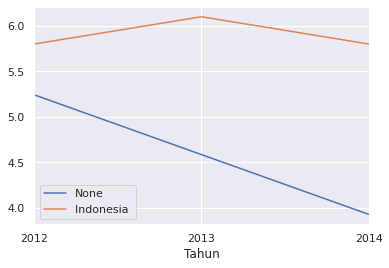

In [200]:
pred.plot(legend=True)
test['Indonesia '].plot(legend=True)

In [201]:
test['Indonesia '].mean()

5.8999999999999995

In [202]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Indonesia ']))
print(rmse)

1.4266177180976853


In [203]:
model2 = ARIMA(data_male['Indonesia '],order=(0,1,0))
model2=model2.fit()
data_male.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
Tahun,,,,,,,,,,,
2010-01-01,7.6,0.4,6.2,1.800000,3.2,3.7,7.4,3.0,0.9,2.3,Laki-laki
2011-01-01,7.5,0.3,5.9,2.900000,2.9,3.7,6.7,2.6,0.6,1.7,Laki-laki
2012-01-01,7.6,0.1,5.8,3.555556,2.9,3.7,7.0,2.7,0.6,1.6,Laki-laki
2013-01-01,2.8,0.3,6.1,2.800000,2.9,3.7,6.7,2.7,0.8,2.0,Laki-laki
2014-01-01,6.2,3.8,5.8,3.800000,3.8,3.8,3.8,2.7,3.8,2.1,Laki-laki


In [204]:
pred=model2.predict(start=len(data_male), end=len(data_male)+30, typ='levels').rename('ARIMA Prediction')

In [205]:
pred

2015-01-01    5.33
2016-01-01    4.86
2017-01-01    4.39
2018-01-01    3.92
2019-01-01    3.45
2020-01-01    2.98
2021-01-01    2.51
2022-01-01    2.04
2023-01-01    1.57
2024-01-01    1.10
2025-01-01    0.63
2026-01-01    0.16
2027-01-01   -0.31
2028-01-01   -0.78
2029-01-01   -1.25
2030-01-01   -1.72
2031-01-01   -2.19
2032-01-01   -2.66
2033-01-01   -3.13
2034-01-01   -3.60
2035-01-01   -4.07
2036-01-01   -4.54
2037-01-01   -5.01
2038-01-01   -5.48
2039-01-01   -5.95
2040-01-01   -6.42
2041-01-01   -6.89
2042-01-01   -7.36
2043-01-01   -7.83
2044-01-01   -8.30
2045-01-01   -8.77
Freq: AS-JAN, Name: ARIMA Prediction, dtype: float64

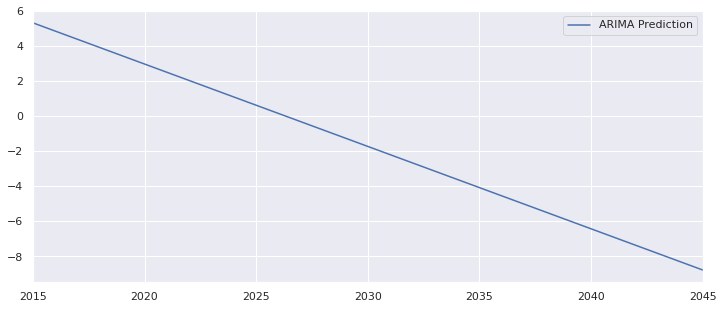

In [206]:
pred.plot(figsize=(12,5),legend=True)

### 2. DataFrame data_female

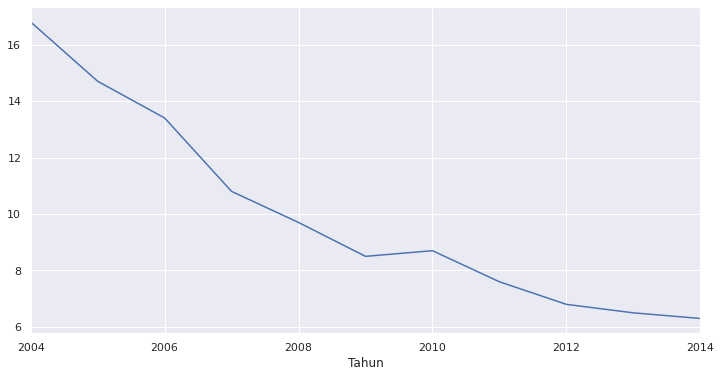

In [207]:
data_female['Indonesia '].plot(figsize=(12,6))

In [208]:
ad_test(data_female['Indonesia '])

1. ADF :  -2.862648785998797
2. P-Value :  0.04986703366522796
3. Num of lag :  3
4. Num of Observation Used for ADF Regression and Critical Values Calculation :  7
5. Critical Values : 
	 1% : -4.9386902332361515
	 5% : -3.477582857142857
	 10% : -2.8438679591836733


In [209]:
stepwise_fit = auto_arima(data_female['Indonesia '], trace = True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=73731.180, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28.079, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29.579, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29.821, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=35.992, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31.090, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.335 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -12.039
Date:                Mon, 28 Jun 2021   AIC                             28.079
Time:                        09:35:04   BIC                             28.684
Sample:                             0   HQIC                            27.415
                                 - 11                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0500      0.268     -3.924      0.000      -1.574      -0.526
sigma2         0.6505      0.361      1.801      0.072      -0.057       1.358
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.47   Prob(JB):                         0.84
Heteroskedasticity (H):               0.38   Skew:                            -0.36
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [210]:
print(data_female.shape)
train1 = data_female.iloc[:8]
test1 = data_female.iloc[8:]
print(train.shape, test.shape)

(11, 11)
(8, 11) (3, 11)


In [211]:
train

,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
Tahun,,,,,,,,,,,
2004-01-01,4.200000,1.900000,10.5,3.600000,3.4,3.6,10.4,5.6,2.1,1.900000,Laki-laki
2005-01-01,4.414286,4.414286,9.3,1.300000,3.4,3.7,7.4,3.9,1.9,4.414286,Laki-laki
2006-01-01,7.400000,5.042857,8.5,5.042857,3.3,3.7,7.7,3.4,1.3,5.042857,Laki-laki
2007-01-01,7.400000,0.700000,8.1,3.100000,3.1,3.7,6.4,2.8,1.3,2.300000,Laki-laki
2008-01-01,7.500000,0.300000,7.6,3.200000,3.2,3.7,7.0,3.0,1.3,2.500000,Laki-laki
2009-01-01,7.500000,0.200000,7.5,4.188889,3.6,3.7,7.4,4.1,1.2,2.500000,Laki-laki
2010-01-01,7.600000,0.400000,6.2,1.800000,3.2,3.7,7.4,3.0,0.9,2.300000,Laki-laki
2011-01-01,7.500000,0.300000,5.9,2.900000,2.9,3.7,6.7,2.6,0.6,1.700000,Laki-laki


In [212]:
model3 = ARIMA(train['Indonesia '],order=(0,1,0))
model3 = model3.fit()
model3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Indonesia    No. Observations:                    7
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  -3.923
Method:                           css   S.D. of innovations              0.424
Date:                Mon, 28 Jun 2021   AIC                             11.846
Time:                        09:35:05   BIC                             11.737
Sample:                    01-01-2005   HQIC                            10.509
                         - 01-01-2011                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6571      0.160     -4.103      0.000      -0.971      -0.343
==============================================================================
"""

In [213]:
start = len(train1)
end = len(train1)+len(test1)-1
pred1 = model3.predict(start=start, end=end, typ='levels')
pred1.index=data_female.index[start:end+1]
print(pred1)

Tahun
2012-01-01    5.242857
2013-01-01    4.585714
2014-01-01    3.928571
dtype: float64


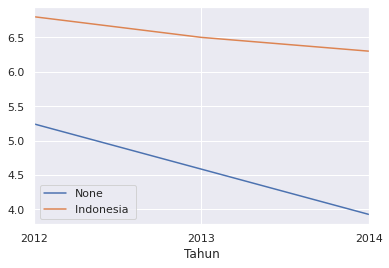

In [214]:
pred1.plot(legend=True)
test1['Indonesia '].plot(legend=True)

In [215]:
test1['Indonesia '].mean()

6.533333333333334

In [216]:
rmse = sqrt(mean_squared_error(pred1, test1['Indonesia ']))
print(rmse)

1.9759265520815046


In [217]:
model4 = ARIMA(data_female['Indonesia '],order=(0,1,0))
model4=model4.fit()
data_female.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


,Brunei Darussalam,Cambodia,Indonesia,Lao's PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam,Jenis Kelamin
Tahun,,,,,,,,,,,
2010-01-01,11.3,0.30,8.7,2.000000,3.40,4.6,6.70,3.4,0.80,3.1,Perempuan
2011-01-01,11.7,0.10,7.6,4.411111,3.30,4.6,6.10,3.2,0.70,2.4,Perempuan
2012-01-01,12.4,0.20,6.8,4.388889,3.20,4.6,6.70,3.1,0.50,2.0,Perempuan
2013-01-01,3.3,0.30,6.5,3.300000,3.40,4.6,5.90,2.9,0.80,2.0,Perempuan
2014-01-01,7.8,4.62,6.3,4.620000,4.62,4.0,4.62,2.9,4.62,2.1,Perempuan


In [218]:
pred1=model4.predict(start=len(data_female), end=len(data_female)+30, typ='levels').rename('ARIMA Prediction')

In [219]:
pred1

2015-01-01    5.250000e+00
2016-01-01    4.200000e+00
2017-01-01    3.150000e+00
2018-01-01    2.100000e+00
2019-01-01    1.050000e+00
2020-01-01    4.440892e-16
2021-01-01   -1.050000e+00
2022-01-01   -2.100000e+00
2023-01-01   -3.150000e+00
2024-01-01   -4.200000e+00
2025-01-01   -5.250000e+00
2026-01-01   -6.300000e+00
2027-01-01   -7.350000e+00
2028-01-01   -8.400000e+00
2029-01-01   -9.450000e+00
2030-01-01   -1.050000e+01
2031-01-01   -1.155000e+01
2032-01-01   -1.260000e+01
2033-01-01   -1.365000e+01
2034-01-01   -1.470000e+01
2035-01-01   -1.575000e+01
2036-01-01   -1.680000e+01
2037-01-01   -1.785000e+01
2038-01-01   -1.890000e+01
2039-01-01   -1.995000e+01
2040-01-01   -2.100000e+01
2041-01-01   -2.205000e+01
2042-01-01   -2.310000e+01
2043-01-01   -2.415000e+01
2044-01-01   -2.520000e+01
2045-01-01   -2.625000e+01
Freq: AS-JAN, Name: ARIMA Prediction, dtype: float64

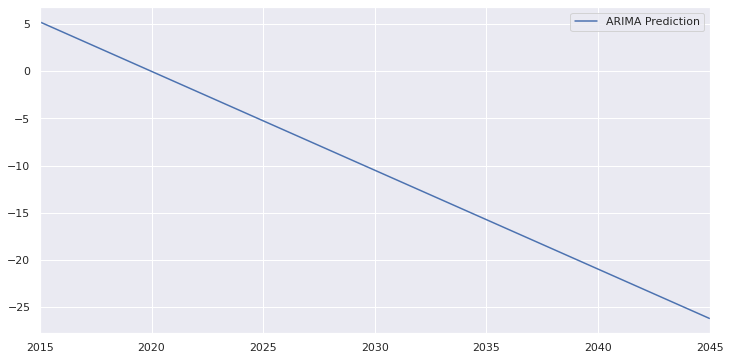

In [220]:
pred1.plot(figsize=(12,6),legend=True)